## Домашнє завдання: Аналіз ознак для побудови лінійної регресії

Необхідні імпорти:

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
file_name = '/content/drive/MyDrive/ML/data/medical-charges.csv'

In [ ]:
medical_df = pd.read_csv(file_name)

In [ ]:
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Відповідь**:

1. Можна спробувати розділити клієнтів на группи по ризикам на основі деяких змінних типу ІМТ та вік та визначити їх середні витрати. При обробці нової клієнта можна визначати до якої групи по показникам він належить та таким чином оцінювати для нього значення charges
2. Зібрати всі фактори у рівняння: проставити їм коефіцієнти, що можуть відображати важливість для нас кожного з факторів, також можна нормалізувати значення кожного із стовпців.
3. Провести попередній аналіз, та визначити фактори, що збільшують значення charges, та встановити для них певне значення, що буде додаватись до якого стандартного значення charges.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

1. Аналіз за розбиттям по категорії sex

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['red', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**:
*   Для більшості (75%) чоловіків витрати на страхування не перевищують $19000;

*   Для більшості(75%) жінок витрати на страхування не перевищують $14500;

*   Медіанне значення витрат для жінок не сильно відрізняється витрат чоловіків, і становить приблизно 9400. Можемо зробити загалом висновок, що стать не сильно впливає на медіанне значення витрат;

2. Аналіз за розбиттям по категорії region

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['red', 'orange', 'green', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**:

*   Медіанне значення для кожного з регіонів має значення близько 9000-10000 витрат. Невелика кількість клієнтів з кожного з регіонів маєзначно вищі витрати.

*   Найнижчі витрати медіанне значення яких наближається до  9000, а саме близько 8700 притаманне *southwest* регіону, в якому більшість клієнтів мають витрати, що не перевищують 13500.

*   Найбльші витрати мать жителі регіону *southeast*, так витрати більшості людей (75%) не перевищують 20000. Також жителі даного регіону мать найвищі показники витрат. Загалом розподіл для даного регіону є найширшим - мінімальне та макисмальне значення витрат з усієї вибірки мають клієнти з даного регіону




**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

1. Візуалізація розподілу region відносно того, чи є людина курцем (smoker)

In [ ]:
px.histogram(medical_df, x='region', color='smoker', title='Region')

**Спостереження**:

- Можемо побачити, що кількість людей в кожному з регіонів прблизно однакова;
- У кожному регіоні перевищує кількість некурців;
- Виглядає, що найбільша кількість курців за кількістю має регіон southeast. Що пов'язано з більшою кількістю клієнтів з цього регіону;
- Візуально можна оцінити, що відсоток курців є приблизно однаковим не залежно від регіону.


2. Візуалізація розподілу children відносно того, чи є людина курцем (smoker)

In [ ]:
px.histogram(medical_df, x='children', color='smoker', title='Сhildren')

**Спостереження**:

- У всіх категоріях некурців більше ніж курців;
- Більшість клієнтів не мають дітей. Відповідно серед них більша кількість і курців і не курців;
- Зі збільшенням кількості дітей чисельність в кожній з категорій зменшується; Найменші кількості клієнтів бачимо для 4 та 5 дітей;
- Виглядає, що статус курця не сильно залежать від  кількості дітей, адже візуально зі хменшенням кількості представників категорії зменшується як статус курців так і статус не курців.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [ ]:
fig = px.violin(medical_df,
                 x='children',
                 y='charges',
                 title='Children vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

**Спостереження**:

- Більшість клієнтів мають витрати в межах нижчого діапазону (приблизно до 10000-15000 тисяч).
- Для клієнтів без дітей розподіл ширший, та є випадки вилеких витрат. Такі витрати виходять за межі значення 30000 та досягають майже 70000;
- Основна частина даних для людей у яких немає дітей зосереджина у нижній частині де значення kde більше, що може світчити про те, що більшість людей без мають нижчі витрати;
- Представники категорії без дітей мають як невисокі витрати так і високі, можливо на їх витрати впливають інші чинники;
- Розподіл для клієнтів з 1-ю дитиною схожий до розпроділу для клієнтів без .дітейю;
- Витрати для клієнтів, що мають 2 дитини зменшується порівняно з кліжнтами без та 1-ю дитиною. Також розподіл дещо вужчий;
- Витрати для клієнтів з 3 дітьми сжий на попередні; Пристуня деяка кількість великих витрат, що досягають приблизного 60000;
- Розподіл витрат для клієнтів з 4-а дітьми, вже порівняно вужчий, за попередні. Максимальні витрати не перевищуть приблизно 50000. Кількість викідів порівняно також зменшується;
- Для клієнтів з 5 дітьми розподіл вужчий, та значення максимальних витрат менше ніж у них категорій. Можливо це пов'язано з невеликою кількістю даних, або такі клієнти мають певні оснобливості, що зумовлють такі показники.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

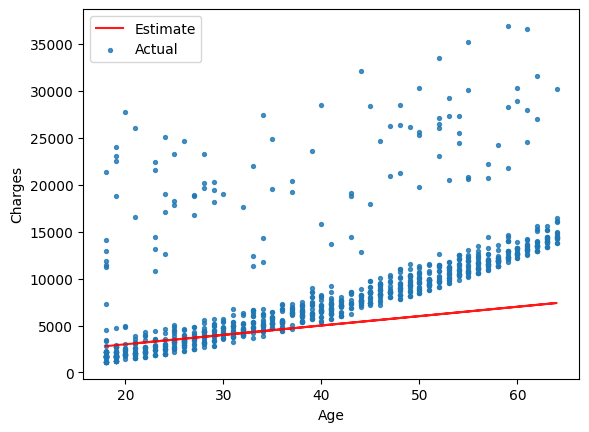

In [ ]:
try_parameters(df=non_smoker_df ,w=100, b=1000)

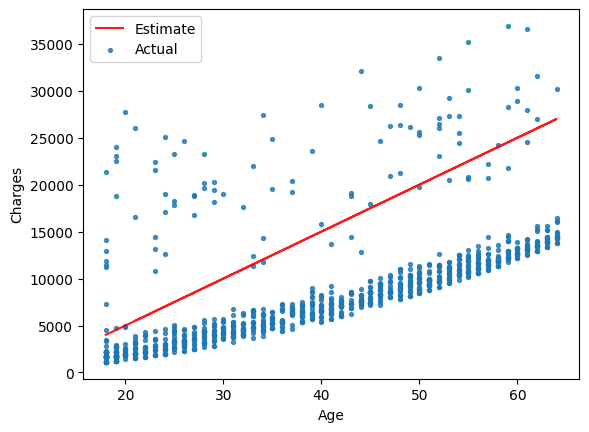

In [ ]:
try_parameters(df=non_smoker_df ,w=500, b=-5000)

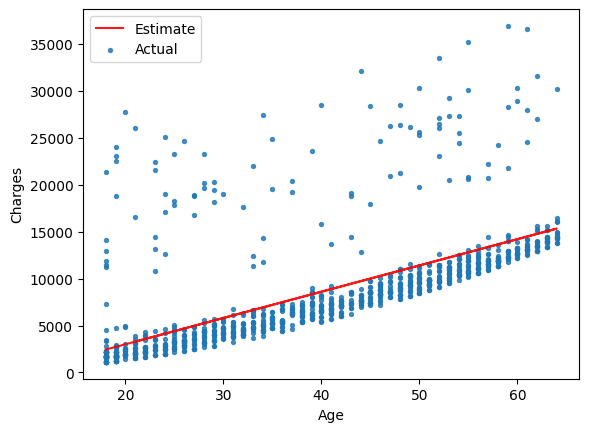

In [ ]:
try_parameters(df=non_smoker_df ,w=280, b=-2600)

**Спостереження**:

Для спроб підібрати коефіцієнти для моделі яка могла б описати залежність використано значення у першому наближенні - $w=100, b=1000$, у другому -  $w=500, b=5000$, у третьому - $w=280, b=-2600$.

- Для значень $w=100, b=1000$ - бачимо, що побудована лінія частково лягає на
розкид, та опиняється значно під ним після значння 40 по осі X.

- Для значень $w=500, b=5000$ - бачимо, що лінія в загальному вигляді описує тренд розкиду, але здіймається вверх занадто швидко. До того ж лінія розташована над нашими данними.

- Для значень $w=280, b=-2600$ - бачимо, що лінія в цілому достаньо гарно описує тренд розкиду, чітко лежить основній частині даних.



Візуально найкраще підходить пряма з коефіцієнтами $w=280$ та $b=-2600$.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

Для зручного обичслення визначно функції.

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
def loss_calc(w, b, df):
  targets = df.charges
  predictions = estimate_charges(df.age, w, b)
  return rmse(targets=targets, predictions=predictions)

Обчслення втрат для першого наближення: $w=100, b=1000$

In [ ]:
loss_calc(w=100, b=1000, df=non_smoker_df)

6285.060000725581

Обчслення втрат для другого наближення: $w=500, b=5000$

In [ ]:
loss_calc(w=500, b=-5000, df=non_smoker_df)

8464.116108792541

Обчслення втрат для третього наближення: $w=280, b=-2600$




In [ ]:
loss_calc(w=280, b=-2600, df=non_smoker_df)

4665.963874569783

**Спостереження**:

Найменше значення **4665.9639** отримано для значень $w=280, b=-2600$.
Також для кожного з припущень можемо бачити, що чим більше візуально пряма співпадає з трендом розподілу значень тим меше значення витрат.

***Загальна стратегія для знаходження кращих значень  w  та  b  методом проб та помилок***

Визначити загальну стратегію пошуку найкращих значень можливо. Наприклад в найпростішому дл язнайходження найкращих значень коефіцієнтів випадку методом спроб і помилок ми можемо:
 визначити інтрвали в яких можуть змінюватися обидва параметра, та можемо проходитися по кожній з комбінацій w та b з певним кроком виконуючи переоцінку значення втрат на кожній з ітерацій, і таким чином відібрати найкращу пару значень w та b, для яких значення rmse найменша.  

Для прикладу можемо визначити для цього функцію:

In [ ]:
def find_params(df, w_range, b_range, eps=10, visualize=False):
  def visualize():
    best_estimated = estimate_charges(ages,best_w, best_b)
    plt.plot(ages, best_estimated, 'r', alpha=0.9);
    plt.scatter(ages, targets, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

  ages = df.age
  targets = df.charges

  w_values = np.arange(*w_range, eps)
  b_values = np.arange(*b_range, eps)
  best_w, best_b, best_rmse = None, None, float('inf')

  for w in w_values:
      for b in b_values:
          curr_rmse = rmse(targets, estimate_charges(ages, w, b))
          if curr_rmse < best_rmse:
              best_w, best_b, best_rmse = w, b, curr_rmse

  if visualize: visualize()

  return  best_w, best_b, best_rmse

(99, 2990, 5453.0446442438715)

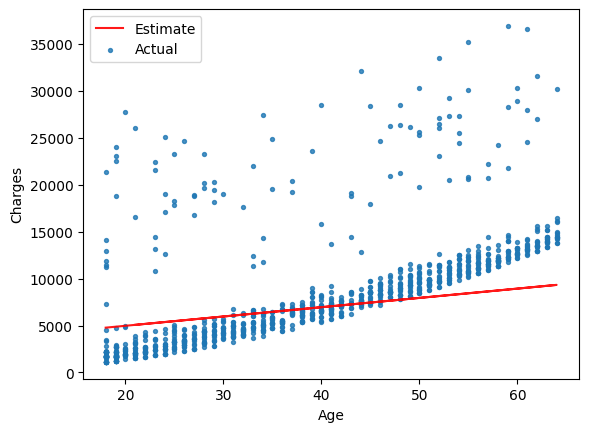

In [ ]:
w_range = [-1, 100]
b_range = [-3000, 3000]

find_params(df=non_smoker_df, w_range=w_range, b_range=b_range, visualize=True)


Як видно з результату данна стратегія робоча, але дуже не ідеальна.

Можна спробувати змінити крок, але це збільшить час пошуку.

За допомгою грубого перебору значень з визначених інтервалів вдалось досягти найменого значння втрат $5453.0446$. І з візуалізації можемо побачити, що пряма в цілому попала на основну частину даних в розкиду, але чітко лежить на ньому лише в інтервалі $(35; 45)$.

Наприклад в ручному підборі, було знайдено, що поєднання парметрів $w=280$ та $b=-2600$ дало значення $rmse=4665.963$ тоді як значення, зайдені за допомогою автоматизованого перебору $w=99$ та $b=2990$ дало $rmse=5453.044$.